# Wine UCI Dataset - Decision Tree Classification 

## Importing libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import pydotplus

## Reading the dataset

In [2]:
dataset = pd.read_csv('wine.data', header = None)

dataset.columns = ['label',
                   'alcohol', 
                   'malic_acid', 
                   'ash', 
                   'alcalinity_of_ash', 
                   'magnesium', 
                   'total_phenols', 
                   'flavanoids', 
                   'nonflavanoid_phenols', 
                   'proanthocyanins', 
                   'color_intensity', 
                   'hue',
                   'OD280/OD315',
                   'proline']

dataset.head()

,label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### General Data Info

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


### Exploratory Data Analysis

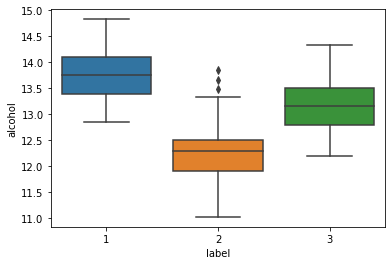

In [5]:
sns.boxplot(x = 'label', y = 'alcohol', data=dataset)

## Building the model

### Train-test split

In [6]:
from sklearn.model_selection import train_test_split

x = dataset.values[:, 1:]
y = dataset.values[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

### *Feature Scaling*

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Training

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_model(height):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
  model.fit(x_train, y_train)
  return model

## Model evaluation

In [9]:
for height in range(1, 21): # 1-10
  model = train_model(height)
  y_pred = model.predict(x_test)
  
  print('--------------------------------------------------------------\n')
  print(f'Depth - {height}\n')
  print("Precision: " + str(accuracy_score(y_test, y_pred)))

--------------------------------------------------------------

Depth - 1

Precision: 0.5555555555555556
--------------------------------------------------------------

Depth - 2

Precision: 0.9444444444444444
--------------------------------------------------------------

Depth - 3

Precision: 0.9444444444444444
--------------------------------------------------------------

Depth - 4

Precision: 0.9166666666666666
--------------------------------------------------------------

Depth - 5

Precision: 0.9166666666666666
--------------------------------------------------------------

Depth - 6

Precision: 0.9166666666666666
--------------------------------------------------------------

Depth - 7

Precision: 0.9166666666666666
--------------------------------------------------------------

Depth - 8

Precision: 0.9166666666666666
--------------------------------------------------------------

Depth - 9

Precision: 0.9166666666666666
-------------------------------------------------------

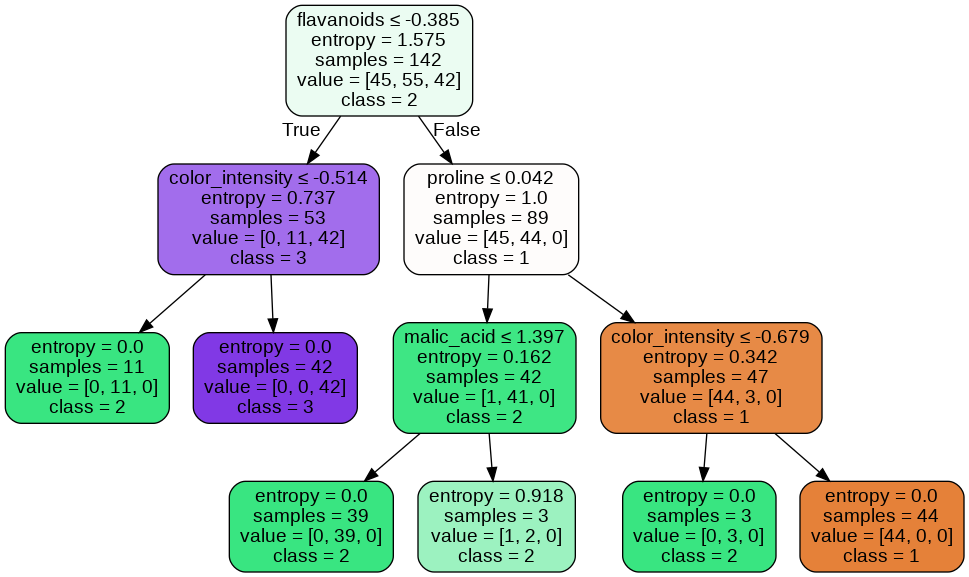

In [10]:
from IPython.display import Image 
from sklearn.tree import export_graphviz

model = train_model(3)


feature_names = ['alcohol',
                 'malic_acid',
                 'ash',
                 'alcalinity_of_ash', 
                 'magnesium', 
                 'total_phenols', 
                 'flavanoids', 
                 'nonflavanoid_phenols', 
                 'proanthocyanins', 
                 'color_intensity', 
                 'hue',
                 'OD280/OD315',
                 'proline']

classes_names = ['%.f' % i for i in model.classes_]

dot_data = export_graphviz(model, filled=True, feature_names=feature_names, class_names=classes_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')